### IDEA: Simulate baseball states given different hit probabilities, and then compare to historical data/simulations

Key Notes: In the second box, percentages corresponding to single, double, triple, HR, walk, and out can all be edited

In [1]:
import random as rand
import numpy as np
import copy


In [2]:
rand.seed(123)
single= (0.25)*.66 #66% of all hits
double= (0.25)*.2 #20% of all hits
triple= (0.25)*.02 #2 percent of all hits
homerun= (0.25)*.12 #12% of hits
walk=0.08
out=1-(single+double+triple+homerun+walk)

lst=[single, double, triple, homerun, walk, out]

#totalruns=0
current_state=[0,0,0,0]
globalDict={}

terminator="off"
runslst=[]

In [3]:


def randomNUM(lst):
    return(np.random.choice(["single", "double", "triple", "homerun", "walk", "out"], 
                            p=lst))

def updateDict(current_state, globalDict):
    #print("UpdtateDict",totalruns)
    if(tuple(current_state) not in globalDict):
        globalDict[tuple(current_state)]=[0, 0]
        
    globalDict[tuple(current_state)][0]+=1
    globalDict[tuple(current_state)][1]-=(totalruns)
    #print("endUpdate",globalDict[tuple(current_state)][1])

def simInning():
    ### maybe a while lopp in here
    global totalruns
    totalruns=0
    current_state=[0,0,0,0]
    #globalDict[current_state]=[1,0]
    global terminator
    terminator="off1"
    states=[]
    
    while(current_state[0]<3):
        updateCurrentState(globalDict, current_state, states)
        #print("H", states)
    finalUpdate(globalDict, states)
    runslst.append(copy.copy(totalruns))
    
    
def finalUpdate(globalDict, states):
    for elem in states:
        globalDict[tuple(elem)][1]+=totalruns
    
    
    
def updateCurrentState(globalDict, current_state, states):
    global terminator
    #print("terminator", terminator)
    if(terminator=="off1"):
        updateDict(current_state, globalDict)
        terminator="off"
        states.append([0,0,0,0])
    aB=randomNUM(lst)
    if aB=="out":
        current_state[0]+=1
        if(current_state[0]!=3):
            updateDict(current_state, globalDict)
        else:
            terminator="on"
            return
    if aB=="single" or aB=="walk":
        singleWalk(current_state)
        updateDict(current_state, globalDict)
    if aB=="double":
        double(current_state)
        updateDict(current_state, globalDict)
    if aB=="triple":
        triple(current_state)
        updateDict(current_state, globalDict)
    if aB=="homerun":
        homerun(current_state)
        updateDict(current_state, globalDict)
    if current_state[0]!=3:
        b=current_state
        states.append(copy.copy(b))
        
    #print(aB, current_state)
    return
        
    
def calculateRuns(globalDict):
    averageRunsPerState={}
    for key in globalDict:
        averageRunsPerState[key]=globalDict[key][1]/globalDict[key][0]
        
    for k, v in averageRunsPerState.items():
        print(k, v)
                                                            
        

def singleWalk(current_state):
    global totalruns
    if current_state[3]==1:
        current_state[3]=0
        totalruns+=1
        
    if current_state[2]==1:
        current_state[3]=1
        current_state[2]=0
        
    if current_state[1]==1:
        current_state[2]=1
    current_state[1]=1
    return

def double(current_state):
    global totalruns
    if current_state[3]==1:
        current_state[3]=0
        totalruns+=1
        
    if current_state[2]==1:
        totalruns+=1
        
    if current_state[1]==1:
        current_state[3]=1
        current_state[1]=0
    current_state[2]=1
    return

def triple(current_state):
    global totalruns
    if current_state[3]==1:
        current_state[3]=0
        totalruns+=1
        
    if current_state[2]==1:
        current_state[2]=0
        totalruns+=1
        
    if current_state[1]==1:
        current_state[1]=0
        totalruns+=1
    current_state[3]=1
    return

def homerun(current_state):
    global totalruns
    totalruns+=sum(current_state[1:])
    current_state[1]=0
    current_state[2]=0
    current_state[3]=0




        
        

    
    

In [4]:
for i in range(100000):
    simInning()
    

In [5]:
calculateRuns(globalDict)

(0, 0, 0, 0) 0.31213834131971346
(1, 0, 0, 0) 0.15234595058615233
(2, 0, 0, 0) 0.04800029380439972
(2, 1, 0, 0) 0.14156031398515512
(2, 1, 1, 0) 0.30657469914881125
(0, 1, 0, 0) 0.6367819677884803
(1, 1, 0, 0) 0.35776937088412497
(0, 0, 1, 0) 0.7890420519979061
(1, 0, 1, 0) 0.4776992444552766
(2, 0, 1, 0) 0.21416911524649038
(2, 1, 0, 1) 0.48052717310824816
(0, 1, 1, 0) 1.1027235050325637
(1, 1, 1, 0) 0.6974344673731177
(1, 1, 1, 1) 1.2550182481751824
(1, 0, 1, 1) 1.0186393289841567
(2, 0, 1, 1) 0.5400912167132559
(2, 1, 1, 1) 0.6533647594278283
(0, 0, 1, 1) 1.4797149122807018
(0, 1, 0, 1) 1.3990174672489082
(1, 1, 0, 1) 0.9261633428300095
(0, 1, 1, 1) 1.792979297929793
(1, 0, 0, 1) 0.679902755267423
(2, 0, 0, 1) 0.3739021329987453
(0, 0, 0, 1) 0.9847009735744089


### Analysis

As I tried to closely tie my at bat scenarios (single, double, triple, hr, bb, out) to their true league average, I think it would be interesting to compare my models' ER for each state compared with ER's based on MLB data. 

Comparing my states to the ones found at https://gregstoll.com/~gregstoll/baseball/runsperinning.html , it is evident that my model slightly underpredicts the total amount of expected runs at each state.

This is likely due to the fact that of elements of baseball that aren't included in my model, the positive offensive factors likely outweigh positive defensive factors.

For example, the exclusion of steals, sacflies, and erros (all positive offensive factors), likely weigh more than the exclusion of double/triple plays and runners caught stealing.

(array([9.2033e+04, 6.6010e+03, 1.1220e+03, 2.0900e+02, 3.3000e+01,
        2.0000e+00]),
 array([ 0.        ,  1.83333333,  3.66666667,  5.5       ,  7.33333333,
         9.16666667, 11.        ]),
 <BarContainer object of 6 artists>)

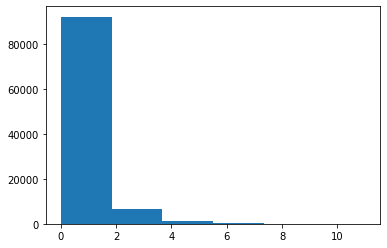

In [6]:
from matplotlib import pyplot as plt

plt.hist(runslst, 6)

### Future Steps

As my model clearly underpredicts expected runs, good next steps would involve somehow incorporating sacflies, errors (wild pitches, etc), and stolen bases into my model. This should help the expected runs for each state become more accurate. As well, it could be possible to inflate the single, double, triple, walk, and HR percentages in this oversimplistic model.